In [13]:
import pandas as pd

from prophet import Prophet
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('../data/compustat/security_daily.csv')

In [15]:
df.tail(3)

,ticker,datadate,prccd,prchd,prcld,prcod,trfd
5754,AMZN,2024-01-02,149.93,152.38,148.390,151.54,NaN
5755,NVDA,2024-01-02,481.68,492.95,475.950,492.44,1.089950
5756,ADBE,2024-01-02,580.07,590.44,576.755,589.51,1.096237


In [25]:
df['datadate'] = pd.to_datetime(df['datadate'], errors='coerce')

In [26]:
ticker = 'AMZN'  # Change this to the ticker you want to forecast
df_ticker = df[df['ticker'] == ticker]

In [27]:
df_ticker['ds'] = df_ticker['datadate']  # 'ds' for date
df_ticker['y'] = df_ticker['prccd']

/var/folders/zc/mk397vzd3rndczvtnq2xwwzr0000gn/T/ipykernel_12243/2042100155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticker['ds'] = df_ticker['datadate']  # 'ds' for date
/var/folders/zc/mk397vzd3rndczvtnq2xwwzr0000gn/T/ipykernel_12243/2042100155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ticker['y'] = df_ticker['prccd']


In [28]:
df_ticker = df_ticker.dropna(subset=['ds', 'y'])

In [29]:
model = Prophet()

In [30]:
model.fit(df_ticker)

23:52:45 - cmdstanpy - INFO - Chain [1] start processing
23:52:45 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = model.make_future_dataframe(periods=30)

In [36]:
forecast = model.predict(future)

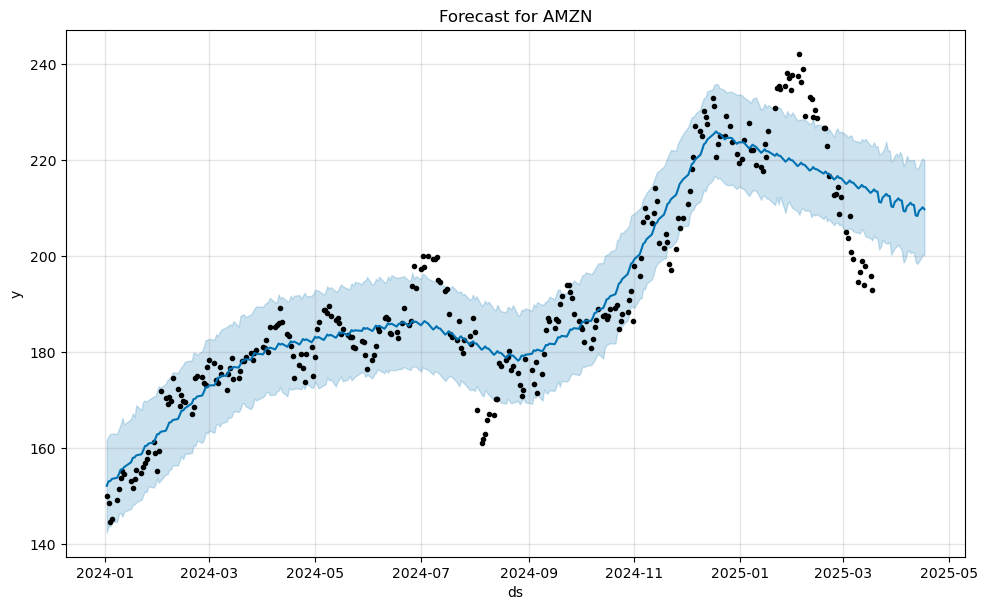

In [37]:
model.plot(forecast)
plt.title(f"Forecast for {ticker}")
plt.show()

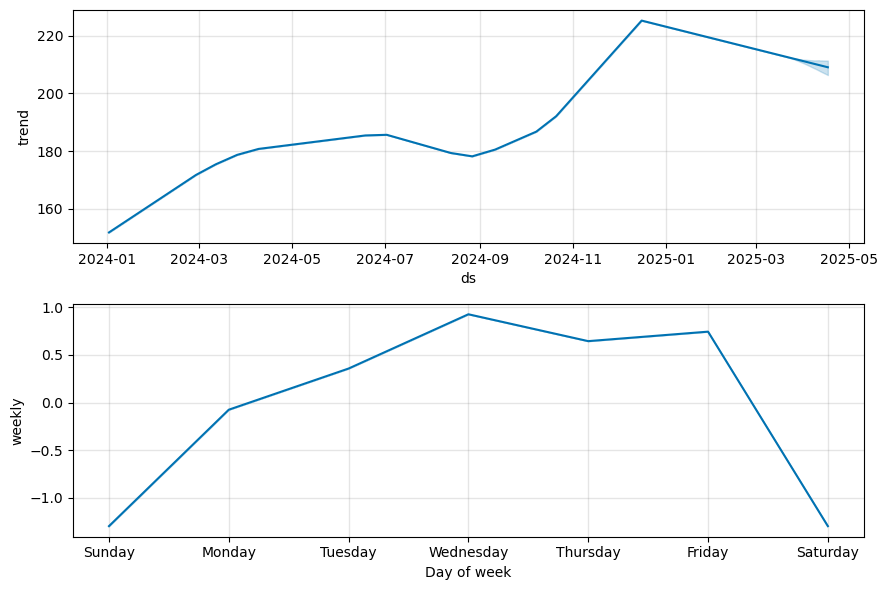

In [38]:
model.plot_components(forecast)
plt.show()